# Why fit so bad?
Here in this notebook we explore why the timeseries data fits so bad. Meaning why is the hypothesis test with the real matrix bad? 

In [1]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D

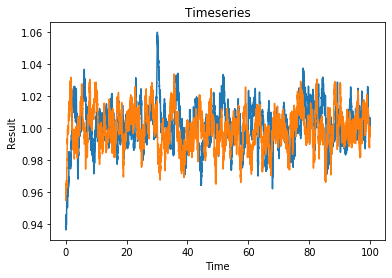

In [4]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 2
numberExperiments = 3

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
TS.generate()
TS.plot(1)# Plot the zeroth experiment.

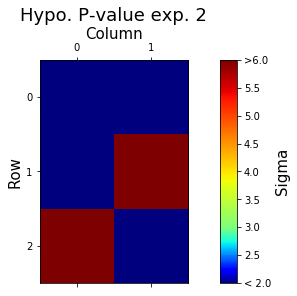

In [8]:
fitObj = fitGLV(TS)
out = fitObj.hypo(fitObj.trueMat,plotNumb=0)

---------------------
Define the a functiont that can plot the 3D data.

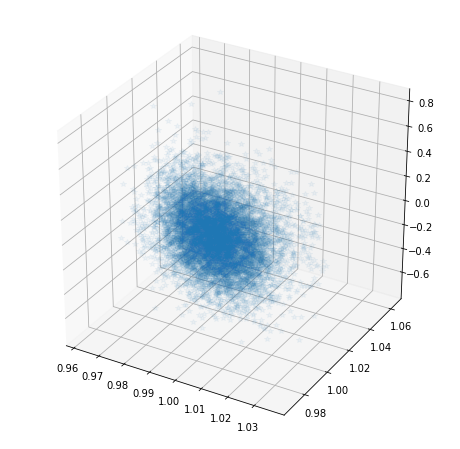

In [21]:
def plot3DY(Y,X,Exp = 0,Ynumber = 0):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,projection='3d')
    
    YData = Y[Exp,:,Ynumber]
    testXSpecies1 =  X[Exp,:,1]
    testXSpecies2 =  X[Exp,:,2]
    ax.plot(testXSpecies1,testXSpecies2,YData,"*", alpha=0.05)
    
    
    
plot3DY(fitObj.Y,fitObj.X)